In [4]:
!pip install tensorflow==2.0-beta0

     |████████████████████████████████| 87.9MB 83.8MB/s 
     |████████████████████████████████| 501kB 46.4MB/s 
     |████████████████████████████████| 3.1MB 44.8MB/s 
     |████████████████████████████████| 61kB 27.8MB/s 
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


In [0]:
import tensorflow as tf
import pandas as pd
import matplotlib as plt

In [11]:
tf.__version__

'2.0.0-beta0'

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

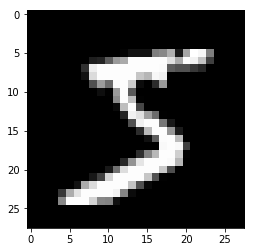

In [14]:
X = x_train[0].reshape([28, 28]);
plt.pyplot.gray()
plt.pyplot.imshow(X)

In [0]:
tf.keras.backend.clear_session()

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(96, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [113]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.5401 - accuracy: 0.8305
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2874 - accuracy: 0.9130
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2361 - accuracy: 0.9283
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2121 - accuracy: 0.9362
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1940 - accuracy: 0.9415
Epoch 6/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1747 - accuracy: 0.9481
Epoch 7/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.1688 - accuracy: 0.9489
Epoch 8/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1618 - accuracy: 0.9518
Epoch 9/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1571 - accuracy: 0.9517
Epoch 10

In [114]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0862 - accuracy: 0.9745


[0.08616652841744944, 0.9745]

In [0]:
model.save('mnist.h5')

In [0]:
x = tf.keras.models.load_model('mnist.h5')

In [117]:
x.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 96)                75360     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                3104      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 78,794
Trainable params: 78,794
Non-trainable params: 0
__________________________________________________